In [1]:
import numpy as np
import matplotlib.pyplot as plt
from Generate_KPATH import*
from plot_Band_Structure import*

# The Remain Kpoints afret Rough Partition in HCP

In [2]:
library = init() #Initialize with Lattice_Information.txt
kpath_matrix, lattice_type, kpath, total_kpoints = ask(library) #Get parameters from user

Enter the lattice type in the lattice type library ('S', 'B', 'F', 'H', 'T') 
H
Enter the kpath with the string form 
('G', 'A', 'K', 'H', 'M', 'L')
GAKHML
Enter total kpoints (Recommened:108*N+1 where N is integer)
6


In [3]:
ks = np.arange(99,120)
Ns = []
for k in ks:
    all_kpath, number, N = generate_kpath(kpath_matrix, k)
    Ns.append(N)
    
Ns = np.array(Ns)

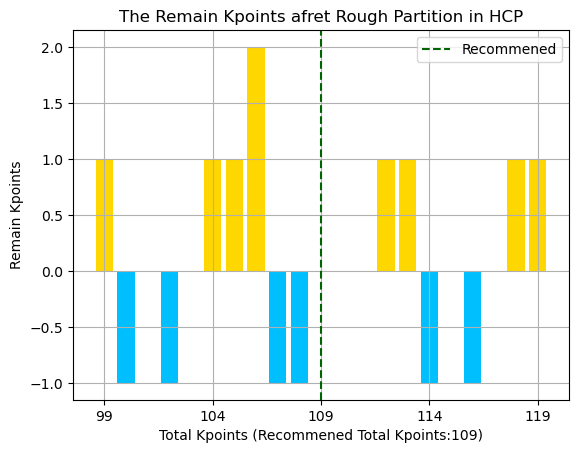

In [4]:
c = np.full(Ns.shape[0],'gold',dtype='U25')
c[Ns<0] = 'deepskyblue'
plt.bar(ks,Ns,color=c)
plt.axvline(109,linestyle='--',color='darkgreen',label='Recommened')
plt.title('The Remain Kpoints afret Rough Partition in HCP')
plt.xlabel('Total Kpoints (Recommened Total Kpoints:109)')
plt.ylabel('Remain Kpoints')
plt.xticks(ks[::5],ks[::5])
plt.grid()
plt.legend()
plt.savefig('Test.png',format='png');

# Main

In [5]:
main()

Enter the lattice type in the lattice type library ('S', 'B', 'F', 'H', 'T') 
H
Enter the kpath with the string form 
('G', 'A', 'K', 'H', 'M', 'L')
GMKGA
Enter total kpoints (Recommened:190*N+1 where N is integer)
192
Enter the filename to save file
Ti
Successfully create the KPOINTS_Ti file!
Successfully create the klabel file!


In [6]:
lines, status = read_energy()

In [7]:
E_of_k, status = transform_bands_to_E_of_k(lines) #2.9624

Enter fermi energy
2.9624


In [8]:
def plot_E_of_k(E_of_k):
    
    fig, ax = plt.subplots() 
    
    xticks, xlabels, start, end = read_klabel()
    show = np.full((E_of_k.shape[0]), True)
    
    for i,(s, e) in enumerate(zip(start,end)):
        
        if s == 0:
            d = 0
        else:
            d += s-end[i-1]
            #plt.axvline(s-d,color='black',linewidth = 1)
        
        ax.plot(np.arange(s-d,e+1-d),E_of_k[s:e+1],color='b')
        
    ax.set_title(input('Enter the title of the band plot\n'))
    ax.set_xlabel('Wave Vector')
    ax.set_ylabel('E - $E_F$ (eV)')
    
    ax.set_xlim(0,E_of_k.shape[0]-d-1)
    
    ax.set_xticks(xticks)
    ax.set_xticklabels(xlabels)
    ax.grid()
    plt.savefig(input('Enter the name of the .png file\n') + '.png', format='png')

def read_klabel():
    
    try:
        
        with open('klabel', 'r') as fh:
        
            lines = fh.readlines()
        
    except:
        
        sys.stderr.write('klabel file Not Found\n')
        
        kpath_file = input('Enter your kpath file name\n')
    
        with open(kpath_file, 'r') as fh:
        
            lines = fh.readlines()
    
    xlabels = []
    xticks  = []
    
    for line in lines[1:]:
        
        xlabels.append(line.split()[0])
        xticks.append(line.split()[-1])
    
    xlabels = np.array(xlabels,dtype='U25')
    
    xlabels[xlabels=='G'] = '$\Gamma$'
    
    xlabels_new = []
    xticks_new  = []
    
    start = [0]
    end   = []
    
    d = 0
    for i,(k,t) in enumerate(zip(xlabels,xticks)):
        
        if i == 0 or i == len(xlabels)-1:
            xlabels_new.append(k)
            xticks_new.append(int(t)-d)
        else:
            if k == 'd':
                xlabels_new.append( xlabels[i-1] + '|' + xlabels[i+1] )
                d += int(xticks[i+1]) - int(xticks[i-1])
                xticks_new.append(int(xticks[i-1]))
                start.append(int(xticks[i+1]))
                end.append(int(xticks[i-1]))
            elif k != 'd' and xlabels[i-1] != 'd' and xlabels[i+1] != 'd':
                xlabels_new.append(k)
                xticks_new.append(int(t)-d)
            else:
                pass
            
    end.append(int(xticks[-1]))
            
    xticks, xlabels = xticks_new.copy(), xlabels_new.copy()
    
    return xticks, xlabels, start, end

Enter the title of the band plot
Ti Band Structure
Enter the name of the .png file
Ti


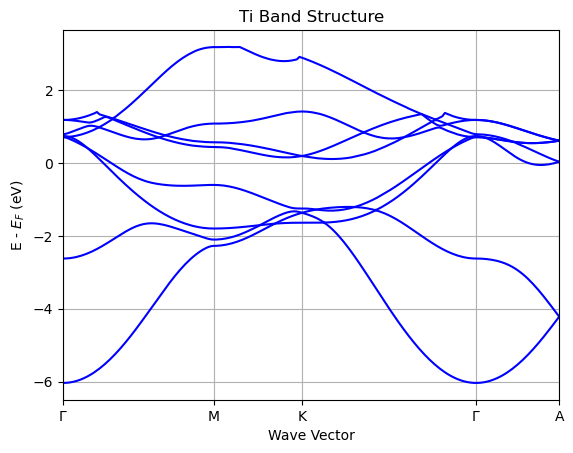

In [9]:
plot_E_of_k(E_of_k)

Enter the title of the band plot
Ti Band Structure (Cut)
Enter the name of the .png file
Ti_Cut


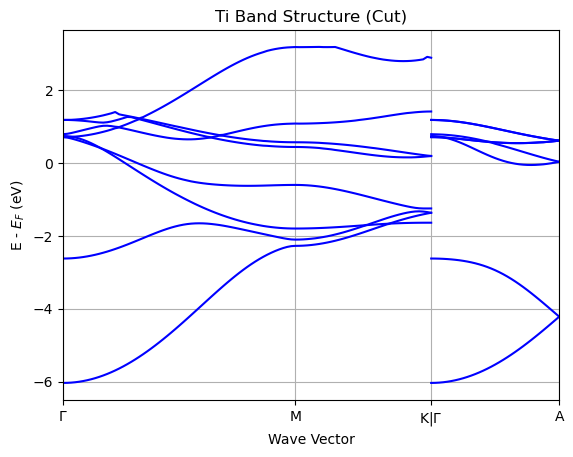

In [11]:
plot_E_of_k(E_of_k)